In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import ASCENDING
import seaborn as sns
import datetime

data= pd.read_csv("taxiclean.csv")
df= pd.DataFrame(data)
data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'time_difference', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [92]:
data.groupby('trip_distance')['total_amount'].mean().sort_values(ascending= False)

trip_distance
28.66    87.24
20.65    82.46
12.59    77.80
18.28    75.80
17.99    75.57
         ...  
0.25      4.30
0.22      4.30
0.37      4.30
0.02      3.80
0.03      3.30
Name: total_amount, Length: 778, dtype: float64

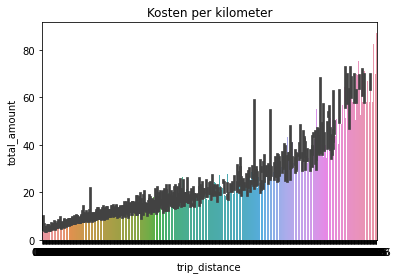

In [93]:
sns.barplot(x='trip_distance', y= 'total_amount', data= df)
plt.title("Kosten per kilometer")
plt.show()

In [94]:
import plotly.express as px
df.sort_values('trip_distance',inplace= True, ascending= True)
# print(df['trip_distance'])
fig= px.scatter(df, x='trip_distance', y= 'total_amount', trendline= "ols", trendline_color_override="black")
fig.show()

In [99]:
df.sort_values('trip_distance',inplace= True, ascending= True)
df['passenger_count'].info()
# print(df['trip_distance'])
fig= px.scatter(df, x='trip_distance', y= 'total_amount', color= 'passenger_count', trendline= "ols",trendline_scope="overall", trendline_color_override="black")
fig.show()

Text(0.5, 1.0, 'Gemiddelde prijs per dag')

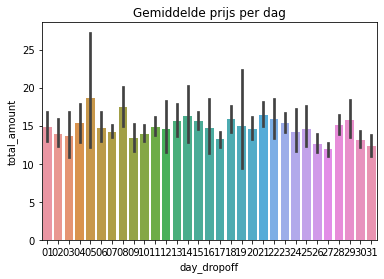

In [73]:
df[["year_dropoff", "month_dropoff", "day_dropoff"]] = df["tpep_dropoff_datetime"].str.split("-", expand = True)
# df['year_dropoff'] = df['year_dropoff'].date()
dagen= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
df["day_dropoff"]= df["day_dropoff"].str[:2]
df.sort_values(by=["day_dropoff"], inplace= True, ascending= True)

# print(df["day_dropoff"])

sns.barplot(x='day_dropoff', y= 'total_amount', data= df)
plt.title('Gemiddelde prijs per dag')


In [96]:
fig1= px.scatter(df, x='passenger_count', y= 'total_amount', trendline= "ols", trendline_color_override="black")
fig1.show()

(array([3422.,    0.,  741.,    0.,    0.,  186.,    0.,   83.,    0.,
           0.,  273.,    0.,  157.]),
 array([1.        , 1.38461538, 1.76923077, 2.15384615, 2.53846154,
        2.92307692, 3.30769231, 3.69230769, 4.07692308, 4.46153846,
        4.84615385, 5.23076923, 5.61538462, 6.        ]),
 <BarContainer object of 13 artists>)

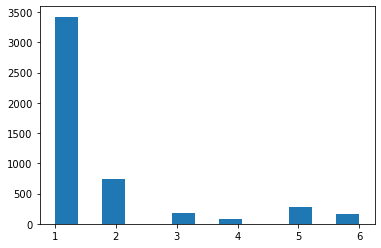

In [89]:
x= df["passenger_count"]
plt.hist(x, bins= 13)